In [188]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [189]:
stock_start_date= "2021-01-01"
today = datetime.today().strftime('%Y-%m-%d')

In [190]:
def get_my_stock(ticker,start=stock_start_date,end=today):
    data=web.DataReader(ticker,data_source='yahoo',start=start,end=end)
    return data

In [191]:
my_stocks = get_my_stock('ETH-USD')
my_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,754.299438,726.511902,751.626648,737.803406,13926846861,737.803406
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
...,...,...,...,...,...,...
2022-01-23,2542.144775,2381.515137,2406.924316,2535.039062,16481489511,2535.039062
2022-01-24,2537.208496,2172.301270,2535.891113,2440.352295,28220804648,2440.352295
2022-01-25,2498.507080,2359.384766,2440.393555,2455.935059,16179776932,2455.935059


In [192]:
future_days = 5

In [193]:
#create a new column
my_stocks[str(future_days)+'_Day_Price_Forecast'] =my_stocks[['Close']].shift(-future_days)
my_stocks[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
Date,,
2020-12-31,737.803406,1100.006104
2021-01-01,730.367554,1207.112183
2021-01-02,774.534973,1225.678101
2021-01-03,975.507690,1224.197144
2021-01-04,1040.233032,1281.077271
...,...,...
2022-01-23,2535.039062,NaN
2022-01-24,2440.352295,NaN
2022-01-25,2455.935059,NaN


In [194]:
X=np.array(my_stocks[['Close']])
X=X[:my_stocks.shape[0]-future_days]
X

array([[ 737.80340576],
       [ 730.36755371],
       [ 774.53497314],
       [ 975.50769043],
       [1040.23303223],
       [1100.00610352],
       [1207.11218262],
       [1225.67810059],
       [1224.19714355],
       [1281.07727051],
       [1262.2467041 ],
       [1090.14538574],
       [1043.43457031],
       [1130.73937988],
       [1218.45300293],
       [1171.83459473],
       [1233.53759766],
       [1230.17224121],
       [1257.27954102],
       [1377.29589844],
       [1382.27404785],
       [1121.57092285],
       [1236.51220703],
       [1230.99060059],
       [1391.609375  ],
       [1324.41479492],
       [1357.05810547],
       [1253.18713379],
       [1332.4921875 ],
       [1382.52282715],
       [1376.11547852],
       [1314.98620605],
       [1369.04052734],
       [1515.19372559],
       [1660.9095459 ],
       [1594.76269531],
       [1718.65087891],
       [1677.84680176],
       [1614.2277832 ],
       [1746.61682129],
       [1768.03503418],
       [1744.243

In [195]:
X.shape

(388, 1)

In [196]:
np.array(my_stocks[str(future_days)+'_Day_Price_Forecast'])

array([1100.00610352, 1207.11218262, 1225.67810059, 1224.19714355,
       1281.07727051, 1262.2467041 , 1090.14538574, 1043.43457031,
       1130.73937988, 1218.45300293, 1171.83459473, 1233.53759766,
       1230.17224121, 1257.27954102, 1377.29589844, 1382.27404785,
       1121.57092285, 1236.51220703, 1230.99060059, 1391.609375  ,
       1324.41479492, 1357.05810547, 1253.18713379, 1332.4921875 ,
       1382.52282715, 1376.11547852, 1314.98620605, 1369.04052734,
       1515.19372559, 1660.9095459 , 1594.76269531, 1718.65087891,
       1677.84680176, 1614.2277832 , 1746.61682129, 1768.03503418,
       1744.2434082 , 1783.79797363, 1843.53259277, 1814.10986328,
       1805.08410645, 1779.79101562, 1781.06750488, 1848.45825195,
       1937.44921875, 1960.16479492, 1919.53405762, 1935.60107422,
       1781.99291992, 1570.20397949, 1626.57568359, 1475.70373535,
       1446.03369141, 1459.97314453, 1416.0489502 , 1564.7076416 ,
       1492.60876465, 1575.85314941, 1541.91430664, 1533.27502

In [197]:
y = np.array(my_stocks[str(future_days)+'_Day_Price_Forecast'])
y =y[:-future_days]
print(y)

[1100.00610352 1207.11218262 1225.67810059 1224.19714355 1281.07727051
 1262.2467041  1090.14538574 1043.43457031 1130.73937988 1218.45300293
 1171.83459473 1233.53759766 1230.17224121 1257.27954102 1377.29589844
 1382.27404785 1121.57092285 1236.51220703 1230.99060059 1391.609375
 1324.41479492 1357.05810547 1253.18713379 1332.4921875  1382.52282715
 1376.11547852 1314.98620605 1369.04052734 1515.19372559 1660.9095459
 1594.76269531 1718.65087891 1677.84680176 1614.2277832  1746.61682129
 1768.03503418 1744.2434082  1783.79797363 1843.53259277 1814.10986328
 1805.08410645 1779.79101562 1781.06750488 1848.45825195 1937.44921875
 1960.16479492 1919.53405762 1935.60107422 1781.99291992 1570.20397949
 1626.57568359 1475.70373535 1446.03369141 1459.97314453 1416.0489502
 1564.7076416  1492.60876465 1575.85314941 1541.91430664 1533.27502441
 1654.74157715 1723.15380859 1834.72790527 1868.04882812 1799.16625977
 1826.19494629 1772.10241699 1924.6854248  1854.56433105 1791.70227051
 1806.9718

In [198]:
y.shape

(388,)

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [200]:
from sklearn.svm import SVR
svr_rbf =  SVR(kernel='rbf', C=1e3,gamma=0.001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.001)

In [201]:
X_test.shape,y_test.shape

((78, 1), (78,))

In [202]:
X_train.shape,y_train.shape

((310, 1), (310,))

In [203]:
svr_rbf_confidence = svr_rbf.score(X_test,y_test)
print('svr_rbf accuracy: ',svr_rbf_confidence)

svr_rbf accuracy:  0.8187881330295661


In [204]:
svm_predict =svr_rbf.predict(X_test)
print(svm_predict[-5:])

[3518.18536367 3871.82496536 3868.90899963 1764.0234293  3580.8982003 ]


In [205]:
print(y_test[-5:])

[2455.93505859 4511.30224609 4414.74658203 1281.07727051 4636.17431641]


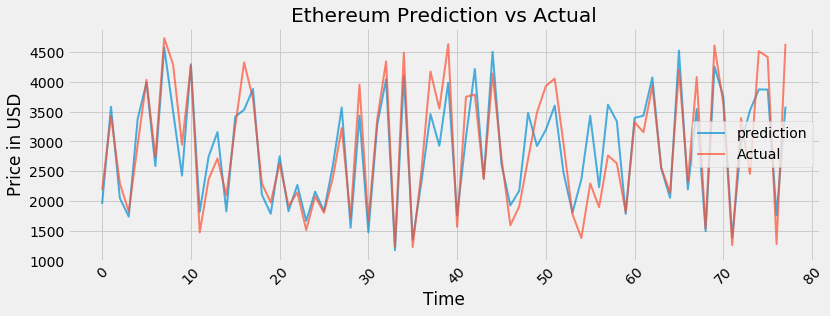

In [206]:
plt.figure(figsize=(12,4))
plt.plot(svm_predict, label='prediction',lw=2,alpha=.7)
plt.plot(y_test, label='Actual',lw=2,alpha=.7)
plt.title('Ethereum Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [207]:
P=np.array(my_stocks[['Close']][-5:])

In [208]:
svm_predict =svr_rbf.predict(P)
svm_predict

array([2427.82269924, 2748.00434975, 2671.69122975, 2615.02607988,
       2638.72689863])

In [209]:
my_stocks[['Close']][-5:]

,Close
Date,
2022-01-23,2535.039062
2022-01-24,2440.352295
2022-01-25,2455.935059
2022-01-26,2468.030273
2022-01-27,2501.643066
